In [1]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv('disastergov.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique

<bound method IndexOpsMixin.nunique of 0                EMS: BACK PAINS/INJURY
1               EMS: DIABETIC EMERGENCY
2                   Fire: GAS-ODOR/LEAK
3                EMS: CARDIAC EMERGENCY
4                        EMS: DIZZINESS
5                      EMS: HEAD INJURY
6                  EMS: NAUSEA/VOMITING
7            EMS: RESPIRATORY EMERGENCY
8                 EMS: SYNCOPAL EPISODE
9           Traffic: VEHICLE ACCIDENT -
10          Traffic: VEHICLE ACCIDENT -
11          Traffic: VEHICLE ACCIDENT -
12          Traffic: VEHICLE ACCIDENT -
13          Traffic: VEHICLE ACCIDENT -
14          Traffic: VEHICLE ACCIDENT -
15          Traffic: VEHICLE ACCIDENT -
16           EMS: RESPIRATORY EMERGENCY
17                       EMS: DIZZINESS
18                EMS: VEHICLE ACCIDENT
19          Traffic: DISABLED VEHICLE -
20          Traffic: VEHICLE ACCIDENT -
21          Traffic: DISABLED VEHICLE -
22                 Fire: APPLIANCE FIRE
23          Traffic: DISABLED VEHICLE -
2

In [9]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

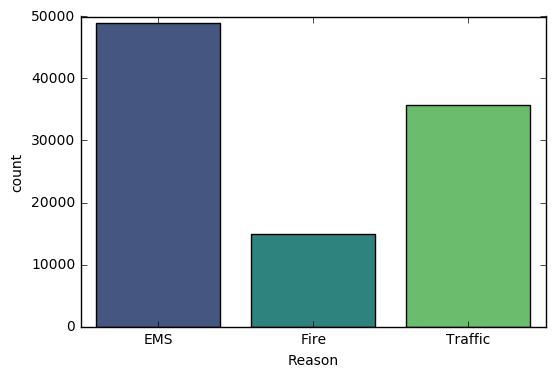

In [11]:
import seaborn as sns
sns.countplot(x='Reason',data=df,palette='viridis')

In [12]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [13]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [14]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [15]:
time=df['timeStamp'].iloc[0]
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week']=df['Day of Week'].map(dmap)

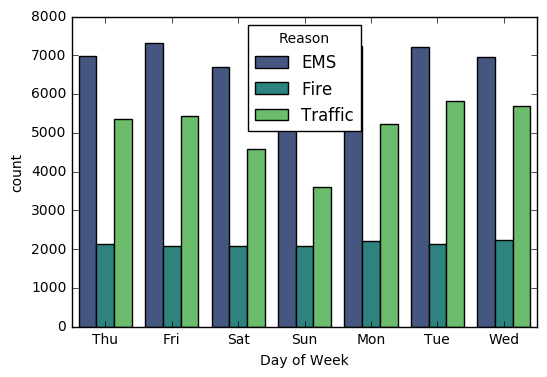

In [17]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

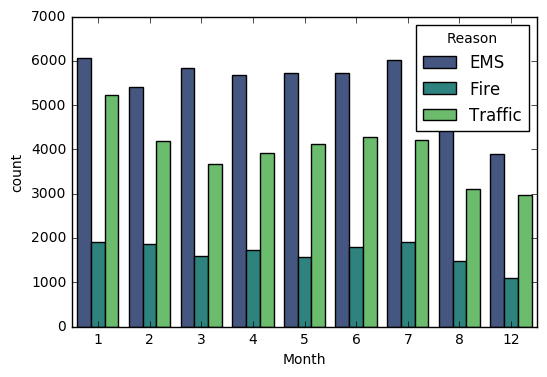

In [18]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

In [19]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


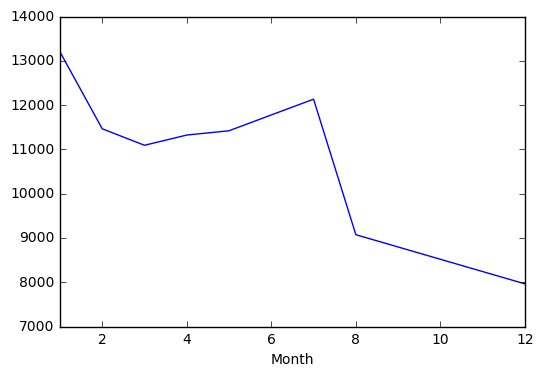

In [20]:
byMonth['twp'].plot()

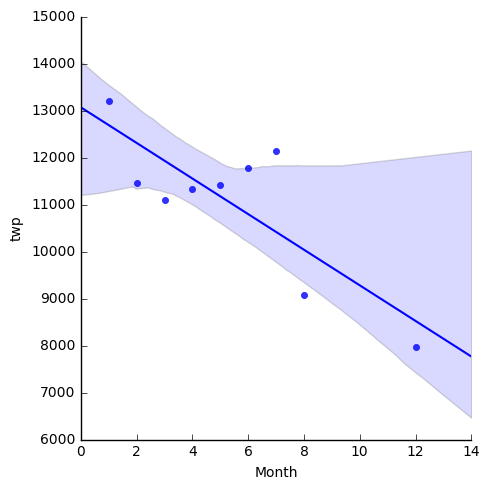

In [21]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

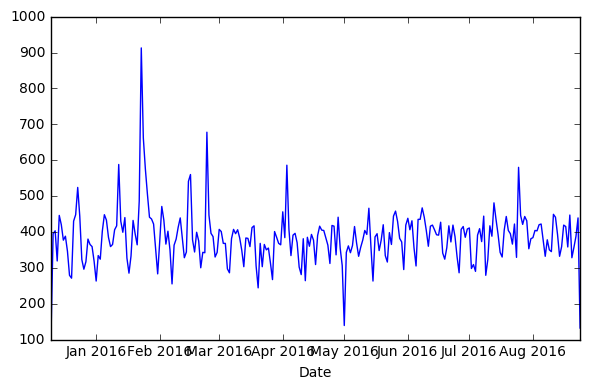

In [22]:
df['Date']=df['timeStamp'].apply(lambda p:p.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

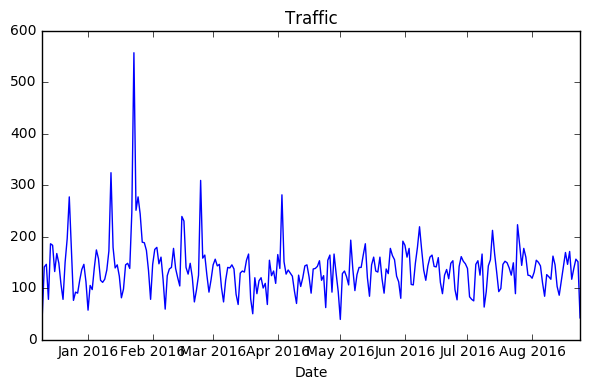

In [23]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

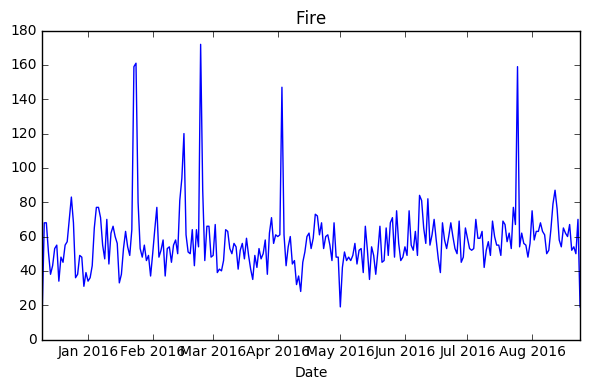

In [24]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

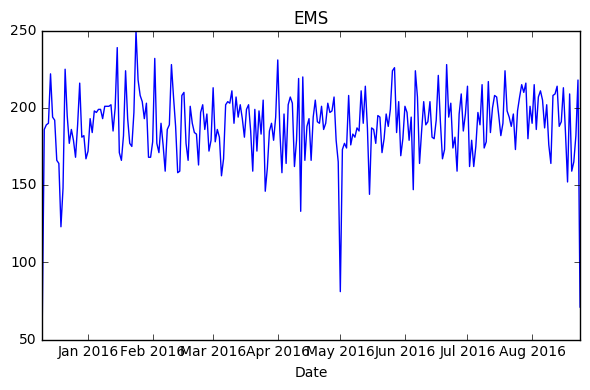

In [25]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [26]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


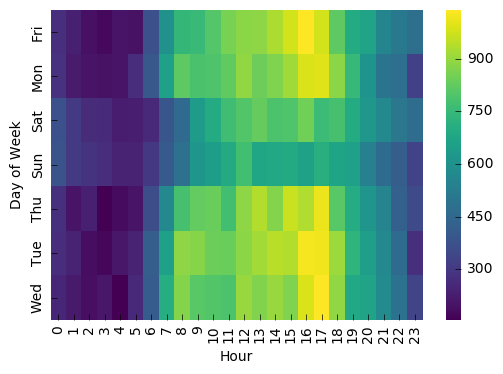

In [27]:
sns.heatmap(dayHour,cmap='viridis')

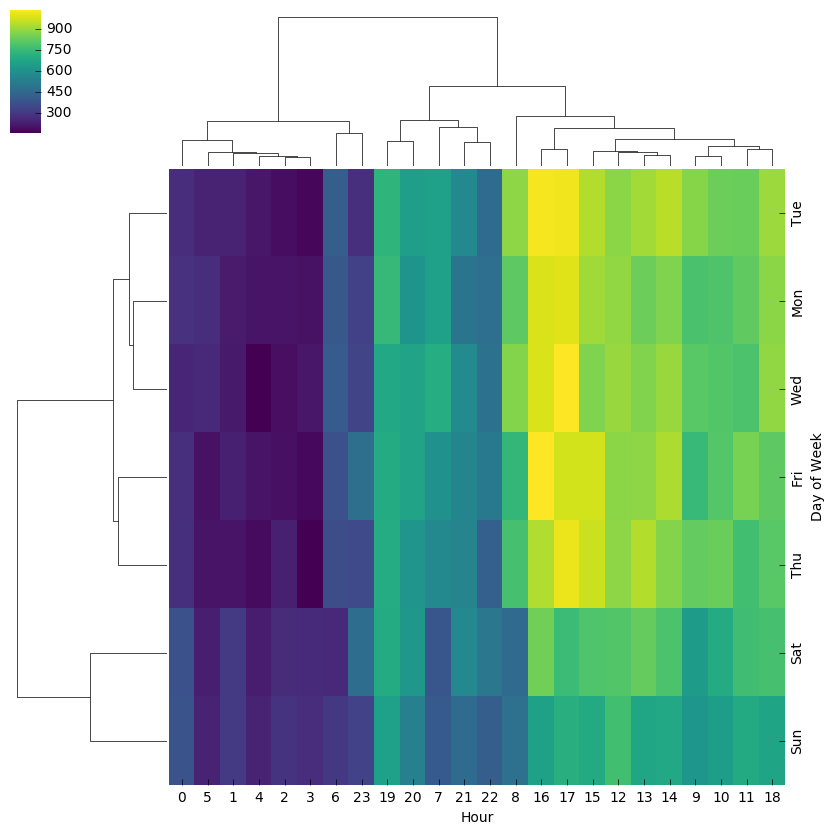

In [28]:
sns.clustermap(dayHour,cmap='viridis')

In [29]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


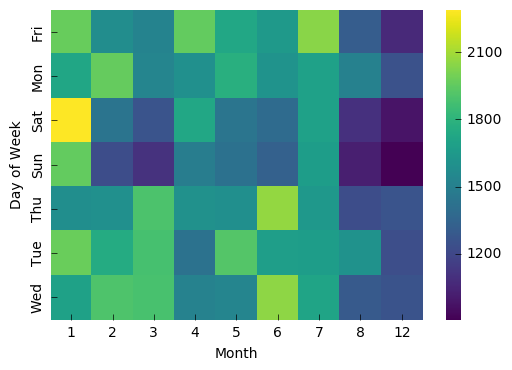

In [30]:
sns.heatmap(dayMonth,cmap='viridis')

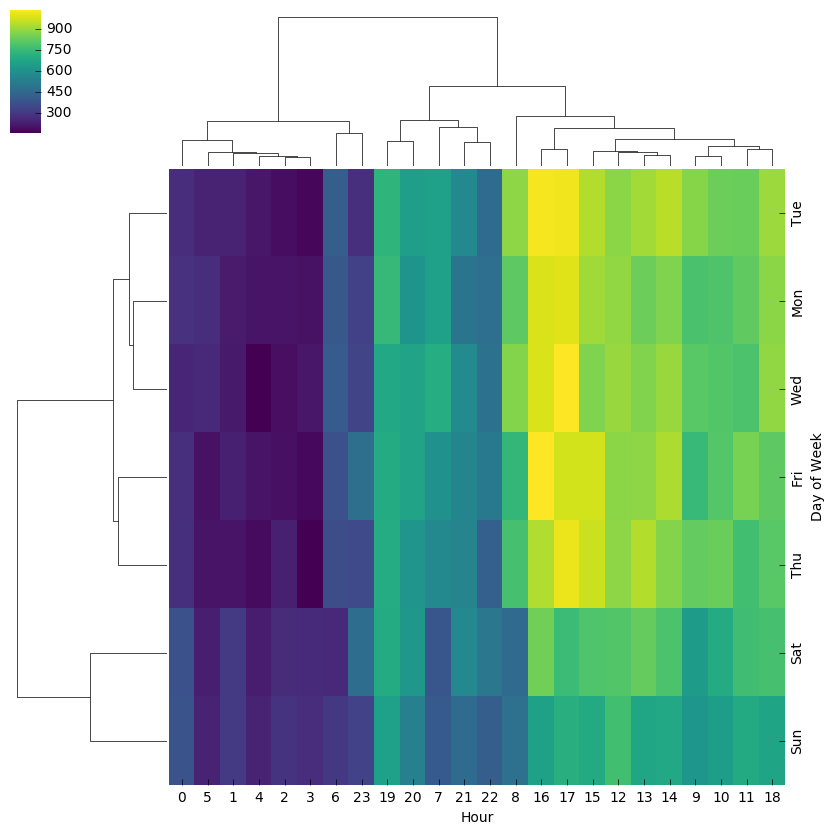

In [31]:
sns.clustermap(dayHour,cmap='viridis')

In [32]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


In [34]:
#data cleaning
df.apply(lambda x:sum(x.isnull()),axis=0)

lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp            0
addr           0
e              0
Reason         0
Hour           0
Month          0
Day of Week    0
Date           0
dtype: int64

In [35]:
df['addr'].value_counts()

SHANNONDELL DR & SHANNONDELL BLVD                 1457
MAIN ST & OLD SUMNEYTOWN PIKE                      390
THE FAIRWAY  & RYDAL RD                            260
GULPH RD & KIRK AVE                                235
EVERGREEN RD & W LIGHTCAP RD                       232
BLACK ROCK RD & S TRAPPE RD                        219
GERMANTOWN PIKE & HANNAH AVE                       210
EAGLEVILLE RD & SUNDERLAND DR                      209
DAVISVILLE RD & PENNYPACK RD                       203
SCHUYLKILL EXPY & WEADLEY RD OVERPASS              199
BETHLEHEM PIKE & NORTH WALES RD                    189
NO LOCATION - NEIGHBORING COUNTY                   182
BETHLEHEM PIKE & TAYLOR RD                         176
PRISON RD & PIGGERY RD                             175
SCHUYLKILL EXPY & CONSHOHOCKEN STATE UNDERPASS     175
BROAD ST & E 6TH ST                                173
HUNTINGDON PIKE & MOREDON RD                       171
SUSQUEHANNA RD & HUNTINGDON RD                     169
VALLEY FOR

In [38]:
df['zip'].fillna(19401,inplace=True)
df['twp'].fillna('LOWER MERION',inplace=True)
df['addr'].fillna('SHANNONDELL DR & SHANNONDELL BLVD',inplace=True)
df.apply(lambda x:sum(x.isnull()),axis=0)


lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp            0
addr           0
e              0
Reason         0
Hour           0
Month          0
Day of Week    0
Date           0
dtype: int64

In [42]:
x=df.iloc[:,[0,1,3]].values
y=df.iloc[:,[4]].values

In [43]:
#splliting dataset into training and testing
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [45]:
x_train

array([[    40.0774952,    -75.3620325,  19406.       ],
       [    40.1348213,    -75.1150608,  19001.       ],
       [    40.2790556,    -75.5742017,  19525.       ],
       ..., 
       [    40.1552833,    -75.2642296,  19422.       ],
       [    40.1370778,    -75.1135686,  19001.       ],
       [    40.1829511,    -75.1160776,  19040.       ]])

In [46]:
x_test

array([[    40.2586572,    -75.2228042,  19446.       ],
       [    40.2275694,    -75.2799321,  19446.       ],
       [    40.172526 ,    -75.2846533,  19422.       ],
       ..., 
       [    40.0922662,    -75.2870084,  19428.       ],
       [    40.1020429,    -75.3794049,  19406.       ],
       [    40.113372 ,    -75.3413966,  19401.       ]])

In [47]:
#algorithm
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
#predicting on test cases
dtc_y_test=dtc_clf.predict(x_test)
dtc_y_test

array(['EMS: RESPIRATORY EMERGENCY', 'EMS: RESPIRATORY EMERGENCY',
       'EMS: HEAD INJURY', ..., 'Traffic: VEHICLE ACCIDENT -',
       'Fire: FIRE ALARM', 'Traffic: VEHICLE ACCIDENT -'], dtype=object)

In [49]:
#accurate score on test
from sklearn.metrics import accuracy_score
dtc_accu_test=accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.23881197075156418